**Técnicas Y Aplicaciones de la Percepción Remota: Cambio Climático-Riesgos y Desastres**
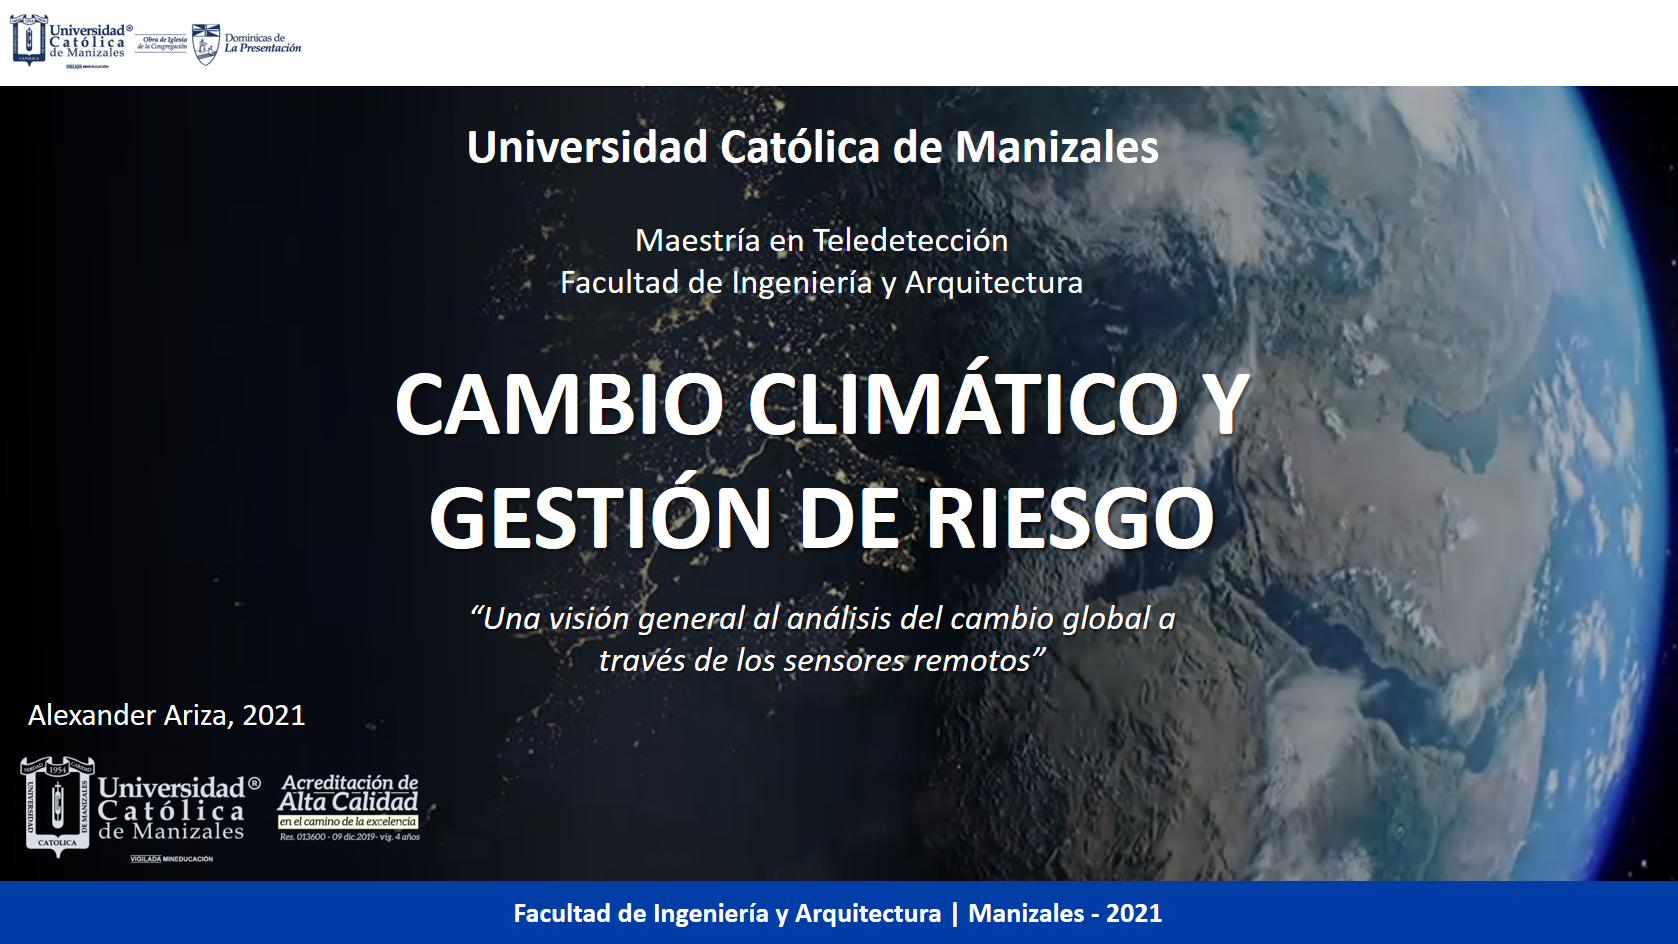

## Cambio climático: Análisis de niveles de CO2 en la atmósfera
En este cuaderno vamos a explorar parte del contenido de la **Unidad II. Integración de información para explicar relaciones causa y efecto.** Mediante el ananlisis de los cambios en las temperaturas medias globales, así como el aumento de las concentraciones de CO2 en la atmósfera.

In [1]:
#Comencemos por importar las librerías que utilizaremos:
import pandas as pd              # manipulación y análisis de datos
import matplotlib.pyplot as plt  # crear visualizaciones
import seaborn as sns            # librería Python para la visualización de datos estadisticos 

#importamos los datos de temperatura y dióxido de carbono global a Colab:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving archive.csv to archive.csv
Saving GlobalLandTemperaturesByCountry.csv to GlobalLandTemperaturesByCountry.csv
Saving GlobalTemperatures.csv to GlobalTemperatures.csv
User uploaded file "archive.csv" with length 31974 bytes
User uploaded file "GlobalLandTemperaturesByCountry.csv" with length 22680393 bytes
User uploaded file "GlobalTemperatures.csv" with length 205875 bytes


## Subir archivos desde tu sistema local de archivos:

El método <code>files.upload</code> devolverá un diccionario de los archivos que se han subido.
Al diccionario se le asignará el nombre del archivo como clave y los valores serán los datos que se han subido.

In [2]:
#Ahora definimos los datos de temperatura y dióxido de carbono global:
data_country = pd.read_csv("./GlobalLandTemperaturesByCountry.csv")
data_colombia = data_country[data_country["Country"] == "Colombia"].copy()
data_colombia["dt"] = pd.to_datetime(data_colombia["dt"])

data_global = pd.read_csv("./GlobalTemperatures.csv")
data_global["dt"] = pd.to_datetime(data_global["dt"])
co2_ppm = pd.read_csv("./archive.csv")

In [3]:
#veamos cuantas dimensiones y registros contiene
data_country.shape

(577462, 4)

In [4]:
#son mas de medio millon de registros ordenados en 4 columnas!!!. Veamos los primeros registros
data_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


#Resultados:
Si se ven algunos campos con valores NaN, son datos nulos, por falta de informacion o sin registro.

Veamos algunas estadísticas básicas de nuestros datos de entrada:

In [5]:
# Ahora veamos algunas estadísticas de nuestros datos
data_country.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


#Anáslisis de Histogramas:
Hacemos una visualización en general de los datos de entrada mediante el análisis de sus histogramas.

En estas gráficas vemos entre qué valores se concentran la mayoría de registros.

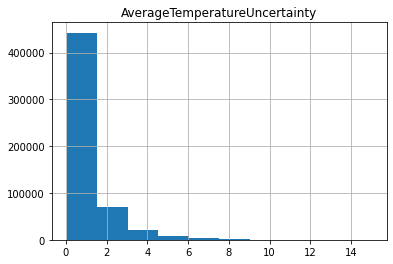

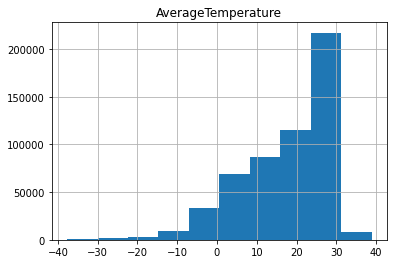

In [8]:
# Visualizamos rápidamente las caraterísticas de entrada
data_country.drop(['AverageTemperature'],1).hist()
data_country.drop(['AverageTemperatureUncertainty'],1).hist()
plt.show()

#Procedimiento:
Calculé la temperatura media del período 1951-1980 para establecer la temperatura media base global. Esta es una práctica estándar en la ciencia del clima. La desviación de esta temperatura se agrega en la columna Anomalía. También creé un nuevo marco de datos para mi país de origen (Colombia) y repetí este proceso.

In [11]:
annual_mean_global = data_global.groupby(data_global["dt"].dt.year).mean()
reference_temperature_global = annual_mean_global.loc[1951:1980].mean()["LandAndOceanAverageTemperature"]
annual_mean_global["Anomaly"] = annual_mean_global["LandAndOceanAverageTemperature"] - reference_temperature_global

annual_mean_colombia = data_colombia.groupby(data_colombia["dt"].dt.year).mean()
reference_temperature_colombia = annual_mean_colombia.loc[1951:1980].mean()["AverageTemperature"]
annual_mean_colombia["Anomaly"] = annual_mean_colombia["AverageTemperature"] - reference_temperature_colombia

Ahora graficaremos los resultados del calculo de La "base global de la anomalía de la media anual de la temperatura", entre 1960 y el 2015:

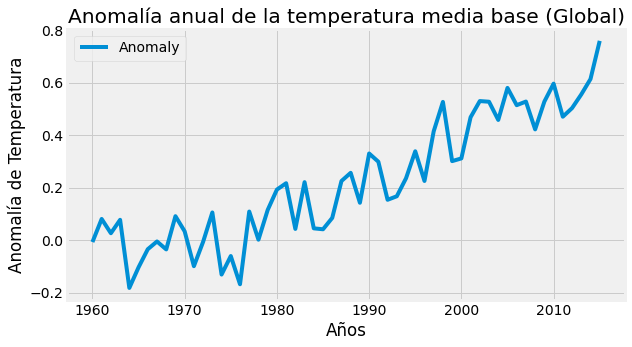

In [12]:
plt.figure()
plt.style.use("fivethirtyeight")
annual_mean_global.loc[1960:2015]["Anomaly"].plot(figsize = (10,5), grid=True, legend=True)
plt.title("Anomalía anual de la temperatura media base (Global)")
plt.xlabel('Años')
plt.ylabel('Anomalía de Temperatura')
plt.show()

#Resultados:
Como podemos ver, la temperatura media global ha crecido de manera constante en las últimas décadas, lo que llevó a una anomalía de temperatura de aproximadamente 0,75 grados centígrados en 2015. Como era de esperar, este resultado es consistente con el consenso científico sobre el cambio climático.

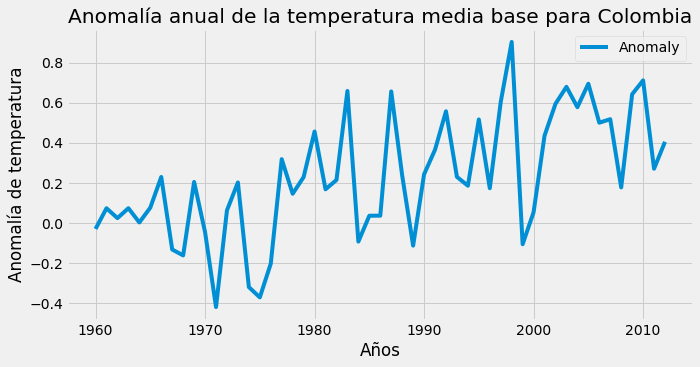

In [13]:
plt.figure()
plt.style.use("fivethirtyeight")
annual_mean_colombia.loc[1960:2012]["Anomaly"].plot(figsize = (10,5), grid=True, legend=True)
plt.title("Anomalía anual de la temperatura media base para Colombia")
plt.xlabel('Años')
plt.ylabel('Anomalía de temperatura')
plt.show()

# Resultados:
Podemos ver como la temperatura media también ha aumentado constantemente en el Colombia.

#Análisis de concentraciones de CO2
A partir de los datos de CO2, podemos ver su distribución a lo largo del tiempo.

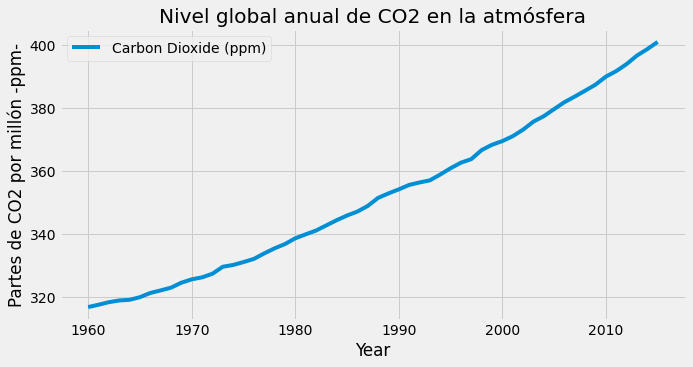

In [16]:
plt.figure()
plt.style.use("fivethirtyeight")
annual_co2_ppm = co2_ppm.groupby(co2_ppm["Year"]).mean()
annual_co2_ppm.loc[1960:2015]["Carbon Dioxide (ppm)"].plot(figsize = (10,5), grid=True, legend=True)
plt.title("Nivel global anual de CO2 en la atmósfera")
plt.ylabel("Partes de CO2 por millón -ppm-")
plt.show()

#Resultados: 
Los niveles de CO2 en la atmósfera han aumentado constantemente en el período 1950-2010, lo que indica una relación lineal entre los gases de efecto invernadero y la temperatura global.

#Análisis de correlación:
mediante la funcion ".corr", podemos definir el coeficiente de correlacion entre la anomalía media anual en ºC y la concentrción de CO2 en el planeta:

In [17]:
annual_co2_temp = pd.merge(annual_mean_global.loc[1960:2015], annual_co2_ppm.loc[1960:2015], left_index=True, right_index=True)
annual_co2_temp = annual_co2_temp[["LandAndOceanAverageTemperature", "Anomaly", "Carbon Dioxide (ppm)"]].copy()
annual_co2_temp.corr()

,LandAndOceanAverageTemperature,Anomaly,Carbon Dioxide (ppm)
LandAndOceanAverageTemperature,1.000000,1.000000,0.923603
Anomaly,1.000000,1.000000,0.923603
Carbon Dioxide (ppm),0.923603,0.923603,1.000000


#Resultado:
El coeficiente de correlación entre el CO2 y anomalía de temperatura media global es de 0,92, lo que confirma la relación lineal entre las dos variables.

#Diagrama de dispersión:
Mediante la función ".scatterplot" podemos definir un dispersograma para ver la dependencia entre esta variables.
El diagrama de dispersión visualiza la relación lineal entre los niveles de CO2 y la anomalía de temperatura.

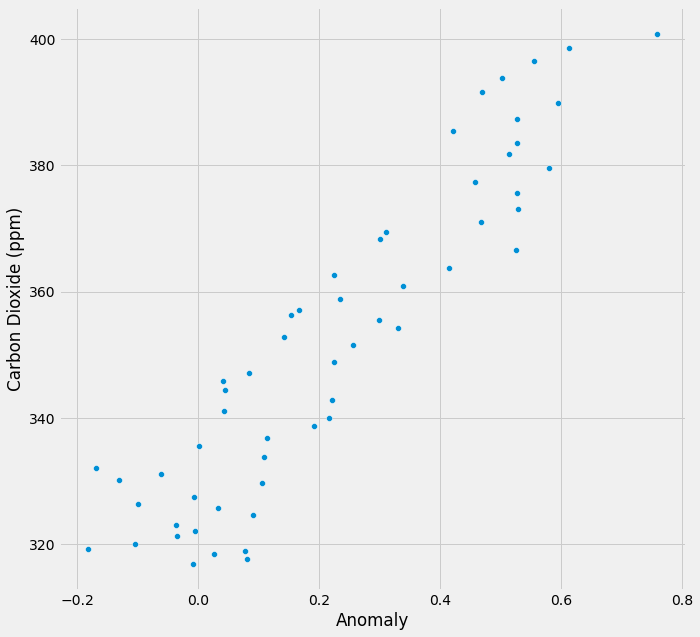

In [18]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Anomaly",y="Carbon Dioxide (ppm)", data=annual_co2_temp)

# Análisis de regresión Lineal con Python y SKLearn
Vamos a crear nuestros datos de entrada por el momento sólo Word Count y como etiquetas los # Shares. Creamos el objeto LinearRegression y lo hacemos “encajar” (entrenar) con el método fit(). Finalmente imprimimos los coeficientes y puntajes obtenidos.

In [19]:
#Comencemos por importar las librerías que utilizaremos:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.

X_train = annual_co2_temp[["Anomaly"]]
y_train = annual_co2_temp[["Carbon Dioxide (ppm)"]]

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)

# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)

# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))

# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [[97.72141018]]
Independent term: 
 [330.21700948]
Mean squared error: 91.68
Variance score: 0.85


# Resultado:
De la ecuación de la recta y = mX + b, se nuestra el valor de la pendiente “m” con un coeficiente de 97.72 y el término independiente “b” es 330.21. Por lo lo que tenemos un Error Cuadrático medio muy bajo…, por lo que en realidad este modelo será muy bueno. De esta manera estamos aprendiendo a usarlo, que es lo que nos importa ahora. Esto también se ve reflejado en el puntaje de Varianza cercano a 1.0.

# Análisis y modelación:
A partir de la regresion anterior, vamos a predecir la cantidad de dioxido de carbono CO2 en (ppm), como consecuencia de una anomalia termica globlal de 1º C:


In [23]:
#Vamos a comprobar:
# Quiero predecir cuántos (ppm) de Dioxido de Carbono) voy a obtener para una anomalia termica de 1ºC,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[1]])
print(int(y_Dosmil))

427
